# GRIP The Sparks Foundation(TSF)

IOT and Computer Vision Internship

### Task-1 Object Detection / Optical Character Recognition (OCR)

##### Overview of the YOLO Object Detection Algorithm

There are two approaches to Object detection and they are:

Two-shot detection.

Single-shot detection.

Two-shot detection method : As the name suggests there are two stages involved in this method. One is region proposal and then in the second stage, the classification of those regions and refinement of the location prediction takes place.

Single-shot detection skips the region proposal stage and yields final localization and content prediction at once.YOLO is a popular example of this approach and we are going to discuss the working of it in the coming sections.

YOLO is popular because it achieves high accuracy while also being able to run in real-time. The algorithm “only looks once” at the image in the sense that it requires only one forward propagation pass through the neural network to make predictions. After non-max suppression (which makes sure the object detection algorithm only detects each object once), it then outputs recognized objects together with the bounding boxes.

YOLO is extremely fast

YOLO sees the entire image during training and test time so it implicitly encodes contextual information about classes as well as their appearance.

YOLO learns generalizable representations of objects so that when trained on natural images and tested on artwork, the algorithm outperforms other top detection methods.

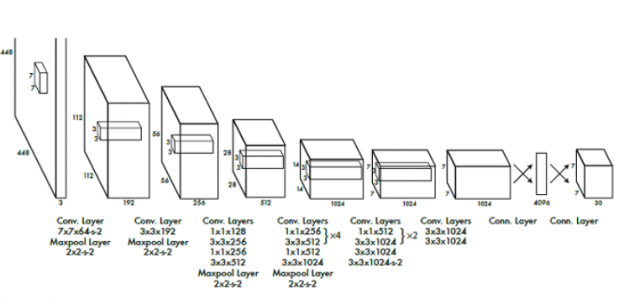

In [1]:
from IPython.display import Image
Image(filename='0_WUpMWzNu_ymDyHPp.png')#This is how yolo works 

####  Steps -

# Object Detection

Step 1 - Importing the Libraries

Step 2 - Initializing the weights file ,config file and names file for detection

Step 3 - Initializing the pre-trained model

Step 4 - Classes which we are going to predict & Output Layers

Step 5 - Loading & Plotting the image

Step 6 - Extracting Features ie. detecting objects

Step 7 - Lets run this object detection on an image

Conclusion

# Optical Character Recognition

Step 1 - Importing the Libraries

Step 2 - Loading & Plotting the image

Step 3 - Converting BGR image to grayscale

Step 4 - Performing OCR

Step 5 - Visualizing output

Conclusion

### Version of YOLO and the coco dataset

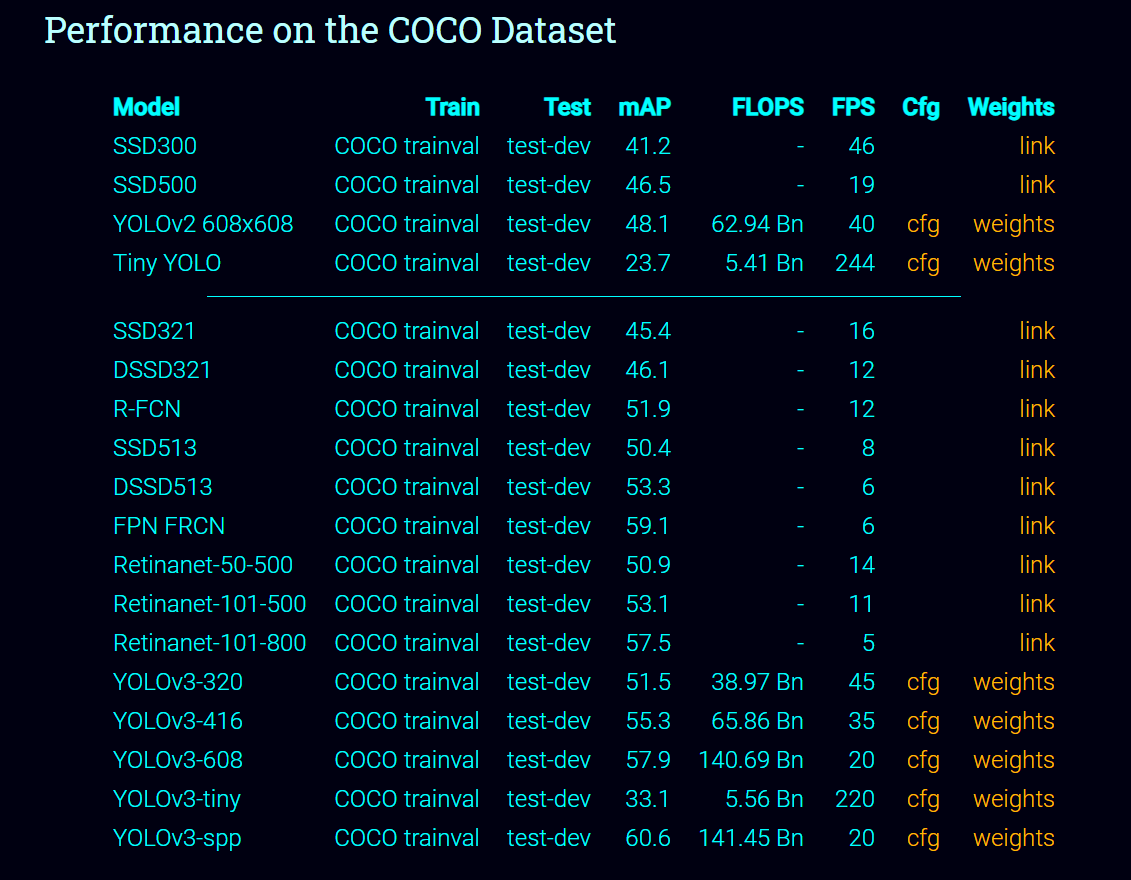

In [2]:
from IPython.display import Image
Image(filename='Screenshot 2021-06-10 100401.png')

Here I am using YOLOv3-608 dataset for better optimization 

COCO is a large-scale object detection, segmentation, and captioning dataset.|

#### Created by Ghanta Sai Krishna

### STEP 1 - Importing the Libraries, Config files and Model graphs

In [3]:
import cv2 as cv
import time
import numpy as np
import matplotlib.pyplot as plt

###  STEP 2 - Initializing the weights file ,config file and names file for detection

In [4]:
# These files can be obtained in official site of yolo .
# Copy thr neural network architecture
cfg_file = r'C:\Users\skgha\OCR\yolov3.cfg\yolov3.cfg'
# Copy the pre-trained weights
weight_file = r'C:\Users\skgha\OCR\yolov3.weights'
# Copy the names of the classes
namesfile = r'C:\Users\skgha\OCR\coco.names\coco.names'

In [5]:
#loading yolov3-608 by passing weights and cfg files
net = cv.dnn.readNet(weight_file,cfg_file)
classes=[]
with open(namesfile,"r") as f:
    classes = [line.strip() for line in f.readlines()]

### STEP 3 - Initializing the pre-trained model

In [6]:
model = cv.dnn_DetectionModel(net)

### STEP 4 - Classes which we are going to predict & Output Layers

In [7]:
print(classes) # These classes can be detected in output

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [8]:
#defining the output layers
print(net.getLayerNames())

['conv_0', 'bn_0', 'leaky_1', 'conv_1', 'bn_1', 'leaky_2', 'conv_2', 'bn_2', 'leaky_3', 'conv_3', 'bn_3', 'leaky_4', 'shortcut_4', 'conv_5', 'bn_5', 'leaky_6', 'conv_6', 'bn_6', 'leaky_7', 'conv_7', 'bn_7', 'leaky_8', 'shortcut_8', 'conv_9', 'bn_9', 'leaky_10', 'conv_10', 'bn_10', 'leaky_11', 'shortcut_11', 'conv_12', 'bn_12', 'leaky_13', 'conv_13', 'bn_13', 'leaky_14', 'conv_14', 'bn_14', 'leaky_15', 'shortcut_15', 'conv_16', 'bn_16', 'leaky_17', 'conv_17', 'bn_17', 'leaky_18', 'shortcut_18', 'conv_19', 'bn_19', 'leaky_20', 'conv_20', 'bn_20', 'leaky_21', 'shortcut_21', 'conv_22', 'bn_22', 'leaky_23', 'conv_23', 'bn_23', 'leaky_24', 'shortcut_24', 'conv_25', 'bn_25', 'leaky_26', 'conv_26', 'bn_26', 'leaky_27', 'shortcut_27', 'conv_28', 'bn_28', 'leaky_29', 'conv_29', 'bn_29', 'leaky_30', 'shortcut_30', 'conv_31', 'bn_31', 'leaky_32', 'conv_32', 'bn_32', 'leaky_33', 'shortcut_33', 'conv_34', 'bn_34', 'leaky_35', 'conv_35', 'bn_35', 'leaky_36', 'shortcut_36', 'conv_37', 'bn_37', 'leaky_

In [9]:
net.getUnconnectedOutLayers()


array([[200],
       [227],
       [254]], dtype=int32)

In [10]:
layer_names = net.getLayerNames()

In [11]:
outputLayers= [layer_names[i[0]-1] for i in net.getUnconnectedOutLayers()]

In [12]:
outputLayers

['yolo_82', 'yolo_94', 'yolo_106']

In [13]:
colors = np.random.uniform(0,255,size=(len(classes),3))

### STEP 5 - Loading & Plotting the image

In [14]:
path = r"C:\Users\skgha\Downloads\images.jpg"

shape of image: 


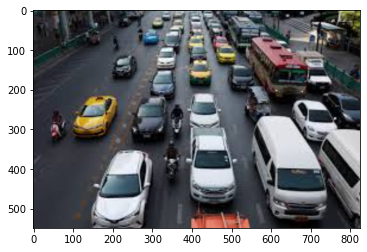

In [16]:
# displaying the original image(Input Image)
%matplotlib inline
img= plt.imread(path)
plt.imshow(img)
print("shape of image: ".format(img.shape))

### STEP 6 - Extracting Features ie. detecting objects

In [17]:
blob = cv.dnn.blobFromImage(img, 1 / 255.0, (416, 416),
	swapRB=False, crop=True)

In [18]:
net.setInput(blob)
outs = net.forward(outputLayers)
print(outs[1])

[[0.02241465 0.02870809 0.04693856 ... 0.         0.         0.        ]
 [0.02242014 0.02619552 0.31363297 ... 0.         0.         0.        ]
 [0.02467088 0.02004863 0.08012536 ... 0.         0.         0.        ]
 ...
 [0.9709012  0.9735931  0.05370378 ... 0.         0.         0.        ]
 [0.9770527  0.9757577  0.26399392 ... 0.         0.         0.        ]
 [0.97632533 0.982925   0.07839207 ... 0.         0.         0.        ]]


In [19]:
#finding confidence score of algorithm in object detection in blob
class_ids=[]
confidences =[]
boxes =[]
h, w = img.shape[:2]
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        #object detected
        if confidence > 0.7:
            center_x= int(detection [0] * w)
            center_y= int(detection [1] * h)
            ww = int(detection [2] * w)
            hh = int(detection [3] * h)
            
            #coordinates of a rectangle
            x= int(center_x - ww/2)
            y= int(center_y - hh/2)
            
            boxes.append([x,y,ww,hh])
            confidences.append(float(confidence)) 
            class_ids.append(class_id)

### STEP 7 - Lets run this object detection on an image and labeling on the image where the object is detected

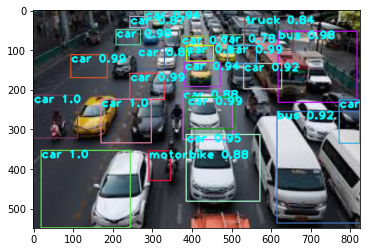

In [20]:
#to eliminate multiple detections for same object
#using non - max suppression
#anything with IOU_threshold < 0.6 will be removed
indexes = cv.dnn.NMSBoxes(boxes,confidences,0.4,0.6) 


# to loop over all the boxes
font = cv.FONT_HERSHEY_PLAIN
colors= np.random.uniform(0,255,size= (len(boxes),4))
for i in range(len(boxes)):
    if i in indexes:
        
        x,y,ww,hh = boxes[i]
        label= str(classes[class_ids[i]])
        confi = str(round(confidences[i],2))
        color = colors[i]
        cv.rectangle(img,(x,y),(x+ww,y+hh),color,2)
        cv.putText(img,label+" "+ confi,(x,y+20),font,2,(0,255,255),4)
plt.imshow(img)
cv.waitKey(0)
cv.destroyAllWindows()

### Conclusion
Here, we used YOLOv3-608 for object detector and visualize the output

Pytesseract
Python-tesseract(pytesseract) is an optical character recognition (OCR) tool for python. That is, it will recognize and “read” the text embedded in images.

Python-tesseract is a wrapper for Google’s Tesseract-OCR Engine. It is also useful as a stand-alone invocation script to tesseract, as it can read all image types supported by the Pillow and Leptonica imaging libraries, including jpeg, png, gif, bmp, tiff, and others. Additionally, if used as a script, Python-tesseract will print the recognized text instead of writing it to a file.

### Optical Character Recognition (OCR)
Character detector which extracts printed or handwritten text from an image or video. We will use pytesseract to perform this task

###  STEP 1 - Importing the Libraries

In [21]:
import pytesseract
from pytesseract import Output

### STEP 2 - Loading the image and plotting it using matplotlib

The type of this input is <class 'numpy.ndarray'>
Shape: (903, 638, 3)


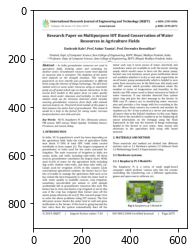

In [22]:
image = cv.imread('irjet-research-paper-on-multipurpose-iot-based-conservation-of-water-resources-in-agriculture-fields-1-638.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

### STEP 3 - Converting BGR image to grayscale.

(-0.5, 637.5, 902.5, -0.5)

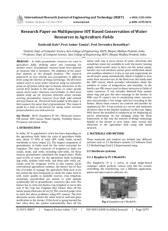

In [23]:
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')
plt.axis('off')

### PERFORMING OCR USING TESSERACT

In [24]:
pytesseract.pytesseract.tesseract_cmd = 'C:\Program Files (x86)\Tesseract-OCR\\tesseract.exe'
print(pytesseract.image_to_string(image))

International Research Journal of Engineering and Technology (IRJET)
wwwirjetnet

TET Volume: 06 Issue: 12 | Dee 2019

e-ISSN:2395-0056
prISSN:2395-0072

 

Research Paper on Multipurpose IOT Based Conservation of Water
Resources in Agriculture Fields

Dashrath Kale, Prof. Ankur Taneja2, Prof. Devendra Rewadikar*

‘Student, Dept. of Computer Science, Sam College of Engineering, RGPV, Bhopal, Madhya Pradesh, India
25Professor, Dept. of Computer Science, Sam College of Engineering, RGPV, Bhopal, Madhya Pradesh, India

 

Abstract ~ In India groundwater resources are used in
‘agriculture fills, drinking water and remaining for
‘another sector. Groundwater resource water level depends
‘on monsoon that is rainwater The depletion of the water
level depends on the drought situation. This research
paperwork on how smartly uses groundwater in afferent
levels using the Internet of things technology. The first lvel
‘module work-on saves water resources wing an automatic
pump on-off system which s